# Modul #1: Tapşırıqlar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Lazım olan kitabxanalar
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import warnings

In [ ]:
sns.set(font_scale = 1.5, style = 'darkgrid', palette = 'bright')
pd.set_option('display.max_columns', None)
warnings.filterwarnings(action = 'ignore')
plt.rcParams['figure.figsize'] = (16, 10)

In [ ]:
# Datasetin yüklənməsi
df = pd.read_csv('/content/drive/MyDrive/Taskilled/DatasetModul1Python.csv')
df.columns = ['İdentifikasiya Nömrəsi', 'Şəhər', 'Növ', 'Marka', 'Model', 'Buraxılış İli', 'Rəng', 'Mühərrik', 'At Gücü', 'Yanacaq Növü', 'Yürüş', 
              'Sürət Qutusu', 'Yeni', 'Ötürücü', 'Qiymət', 'Elan Tarixi', 'Baxış Sayı', 'Şəkil Linki', 'Elan Linki', 'Salon Maşını']
df.head()

,İdentifikasiya Nömrəsi,Şəhər,Növ,Marka,Model,Buraxılış İli,Rəng,Mühərrik,At Gücü,Yanacaq Növü,Yürüş,Sürət Qutusu,Yeni,Ötürücü,Qiymət,Elan Tarixi,Baxış Sayı,Şəkil Linki,Elan Linki,Salon Maşını
0,5511440,Bakı,Sedan,Audi,A5,2013,Ağ,2.0 L,211 hp,Benzin,145000 km,Variator,Xeyr,Ön,17700 $,23.09.2021,95,https://turbo.azstatic.com/uploads/f330x248/20...,https://turbo.az/autos/5511440-audi-a5,Şəxsi
1,5511282,Bakı,Hetçbek/Liftbek,Audi,A5,2012,Qara,2.0 L,211 hp,Benzin,182325 km,Avtomat,Xeyr,Tam,29000 AZN,23.09.2021,140,https://turbo.azstatic.com/uploads/f330x248/20...,https://turbo.az/autos/5511282-audi-a5,Şəxsi
2,5511120,Sumqayıt,Sedan,Audi,A6,2011,Qara,2.0 L,252 hp,Benzin,229000 km,Avtomat,Xeyr,Ön,15800 $,23.09.2021,156,https://turbo.azstatic.com/uploads/f460x343/20...,https://turbo.az/autos/5511120-audi-a6,Salon
3,5346751,Bakı,Hetçbek/Liftbek,Audi,A7,2012,Qəhvəyi,3.0 L,310 hp,Benzin,117000 km,Avtomat,Xeyr,Tam,24000 $,23.09.2021,9513,https://turbo.azstatic.com/uploads/f330x248/20...,https://turbo.az/autos/5346751-audi-a7,Şəxsi
4,5511023,Bakı,Sedan,Audi,A8,2002,Gümüşü,2.8 L,193 hp,Benzin,200000 km,Avtomat,Xeyr,Arxa,9300 AZN,23.09.2021,109,https://turbo.azstatic.com/uploads/f330x248/20...,https://turbo.az/autos/5511023-audi-a8,Şəxsi


***
### Tapşırıq #1

İdentifikasiya Nömrəsi, Şəkil Linki, və Elan Linki sütunlarını datasetdən çıxartmaq lazımdır çünki bu sütunlar hər hansı bir analizdə bizə lazım olmayacaq.

In [ ]:
# Kodu bu şərhin altına yaz
df.drop(['İdentifikasiya Nömrəsi', 'Şəkil Linki', 'Elan Linki'], axis=1, inplace=True)
assert df.shape[1] == 17

***
### Tapşırıq #2

- Sütun adları arasındakı boşluğu altdan çəkilmiş xətlə əvəzlə
- Bütün sütun adlarını kiçilt
- Sütun adlarında ola biləcək potensial boşluqları sil
- İlk beş sətiri göstər

In [ ]:
# Kodu bu şərhin altına yaz
# str.lower sütun adlarının kiçildilməsi üçün istifadə olunur. str.strip isə sütün adlarından ola biləcəq boşluqları silir.
df.columns = df.columns.str.lower().str.strip()
df.rename(columns = {
    'buraxılış i̇li':'buraxılış_ili', 
    'at gücü':'at_gücü', 
    'yanacaq növü':'yanacaq_növü', 
    'sürət qutusu':'sürət_qutusu', 
    'elan tarixi':'elan_tarixi', 
    'baxış sayı':'baxış_sayı', 
    'salon maşını':'salon_maşını'
    }, inplace = True)
df.head()

,şəhər,növ,marka,model,buraxılış_ili,rəng,mühərrik,at_gücü,yanacaq_növü,yürüş,sürət_qutusu,yeni,ötürücü,qiymət,elan_tarixi,baxış_sayı,salon_maşını
0,Bakı,Sedan,Audi,A5,2013,Ağ,2.0 L,211 hp,Benzin,145000 km,Variator,Xeyr,Ön,17700 $,23.09.2021,95,Şəxsi
1,Bakı,Hetçbek/Liftbek,Audi,A5,2012,Qara,2.0 L,211 hp,Benzin,182325 km,Avtomat,Xeyr,Tam,29000 AZN,23.09.2021,140,Şəxsi
2,Sumqayıt,Sedan,Audi,A6,2011,Qara,2.0 L,252 hp,Benzin,229000 km,Avtomat,Xeyr,Ön,15800 $,23.09.2021,156,Salon
3,Bakı,Hetçbek/Liftbek,Audi,A7,2012,Qəhvəyi,3.0 L,310 hp,Benzin,117000 km,Avtomat,Xeyr,Tam,24000 $,23.09.2021,9513,Şəxsi
4,Bakı,Sedan,Audi,A8,2002,Gümüşü,2.8 L,193 hp,Benzin,200000 km,Avtomat,Xeyr,Arxa,9300 AZN,23.09.2021,109,Şəxsi


***
### Tapşırıq #3
**elan_tarixi** sütununun data növünü zaman data növünə dəyiş.

In [ ]:
# Kodu bu şərhin altına yaz
df['elan_tarixi'] = pd.to_datetime(df['elan_tarixi'])
assert df.elan_tarixi.dtype == '<M8[ns]'

***
### Tapşırıq #4
- **mühərrik** sütunununda ***L***-i sil
- **at_gücü** sütunununda ***hp***-i sil
- **yürüş** sütunununda ***km***-i sil

In [ ]:
# Kodu bu şərhin altına yaz

def remove_measure(df, *args):
  '''1-dən çox sütünda eyni şeyi icra etməliyəm. 
     Təkrarın qarşısını almaq üçün funksiya yazdım. 
     (Hər üç sütünun dtype object olduğu üçün funksiya işlədi)
     params:
     df: dataframe
     *args: columns' name'''
  for column in args:
    new_column = []
    for row in df[column]:
      new_column.append(row.split()[0].strip())
    df[column] = new_column
  
  return df[column]

remove_measure(df, 'mühərrik', 'at_gücü', 'yürüş')

assert df.mühərrik.str.contains(pat = 'L').unique()[0] == False
assert df.at_gücü.str.contains(pat = 'hp').unique()[0] == False
assert df.yürüş.str.contains(pat = 'km').unique()[0] == False

***
### Tapşırıq #5
- **mühərrik** sütununun data növünü **float** data növünə dəyiş
- **at_gücü** və **yürüş** sütunlarının data növünü **int** data növünə dəyiş

In [ ]:
# Kodu bu şərhin altına yaz
def alter_dtype(df, **kwargs):
    for key, value in kwargs.items():
      df[key] = df[key].astype(value)

alter_dtype(df, mühərrik='float32', at_gücü='int64', yürüş='int64')


assert df.mühərrik.dtype == 'float32'
assert df.at_gücü.dtype == 'int64'
assert df.yürüş.dtype == 'int64'

***
### Tapşırıq #6
- Cari ildən **buraxılış_ili** sütununun dəyərlərini çixib **yaş** sütunu yarat

In [ ]:
cari_il = datetime.date.today().year

df['yaş'] = cari_il - df['buraxılış_ili']


# Kodu bu şərhin altına yaz

assert 'yaş' in df.columns.tolist()

***
### Tapşırıq #7
- **convert_currency** funksiyası yaradaraq avro və dollar valyutalı qiymətləri manat valyutalı qiymətlərə çevir. Avro valyutalı qiymətləri **1.81**-ə dollar valyutalı qiymətləri isə **1.7**-ə vur, **AZN**, **$**, **€** simvollarını sil və **qiymət** sütununun data növünü **integer** data növünə çevir

In [ ]:
def convert_currency(data_frame = None):
    # Kodu bu şərhin altına yaz
    new_currency = []
    for row in data_frame['qiymət']:

      # try:
      #   if row.split()[1] == 'AZN':
      #     new_currency.append(int(row.split()[0].strip()))
      #   elif row.split()[1] == '$':
      #     new_currency.append(int(row.split()[0].strip()) * 1.7)
      #   elif row.split()[1] == '€':
      #     new_currency.append(int(row.split()[0].strip()) * 1.81)
      # except:
      #   if row[-1] == '€':
      #     new_currency.append(int(row[:-1].strip()) * 1.81)


      if row[-3:] == 'AZN':
          new_currency.append(int(row[:-3].strip()))
      elif row[-1] == '$':
        new_currency.append(int(row[:-1].strip()) * 1.7)
      elif row[-1] == '€':
        new_currency.append(int(row[:-1].strip()) * 1.81)

    data_frame['qiymət'] = new_currency
    data_frame['qiymət'] = data_frame['qiymət'].astype('int')
    return data_frame

- **create_agg_feature** funksiyası yaradaraq nəqiliyyat vasitəsinin qiymətinin həmin markanın ortalama qiymətindən böyük olub olmadığını göstərən **ortala_qiymətdən_böyük** adlı sütun yarat

In [ ]:
def create_agg_feature(data_frame = None):
    # Kodu bu şərhin altına yaz
    mean_ = data_frame.groupby('marka')['qiymət'].mean()
    ortalama_qiymetden_boyuk = []
    for index, row in data_frame[['marka', 'qiymət']].iterrows():
      ortalama_qiymetden_boyuk.append(row.qiymət > mean_[row.marka])
    data_frame['ortala_qiymətdən_böyük'] = ortalama_qiymetden_boyuk

    data_frame.loc[data_frame['ortala_qiymətdən_böyük'] == False, 'ortala_qiymətdən_böyük'] = 'Xeyr'
    data_frame.loc[data_frame['ortala_qiymətdən_böyük'] == True, 'ortala_qiymətdən_böyük'] = 'Bəli'
  
    return data_frame

- **handle_categoric_features** funksiyası yaradaraq data növü **obyekt** və ya **kateqoriya** olan sütunların dəyərlərində ola biləcək potensial boşluqları sil, **salon_maşını** sütununda dəyərləri bu şəkildə əvəzlə. 

> 'Şəxsi'-->'Xeyr', 'Salon'-->'Bəli'

> Daha sonra isə **şəhər** sütununun dəyərləri ***Bakı*** olmayan dəyərlərin hamısını ***Digər*** ilə əvəzlə

In [ ]:
def handle_categoric_features(data_frame = None):
    # Kodu bu şərhin altına yaz
    for column in data_frame.select_dtypes(include=['object']).columns:
      data_frame[column] = data_frame[column].str.strip()


    data_frame.loc[data_frame['salon_maşını'] == 'Şəxsi', 'salon_maşını'] = 'Xeyr'
    data_frame.loc[data_frame['salon_maşını'] == 'Salon', 'salon_maşını'] = 'Bəli'

    data_frame.loc[data_frame['şəhər'] != 'Bakı', 'şəhər'] = 'Digər'

    return data_frame

- **create_new_date_features** funksiyası yaradaraq 4 yeni sütun yarat. 
> 1. **elan_ili** - Elanının qoyulduğu il
> 2. **elan_ayı** - Elanının qoyulduğu ay
> 3. **elan_günü** - Elanının qoyulduğu ayın gün
> 4. **elan_həftə_günü** - Elanının qoyulduğu həftə günü
- **elan_tarixi** sütununu isə datasetdən çıxart

In [ ]:
def create_new_date_features(data_frame = None):
    # Kodu bu şərhin altına yaz 
    data_frame['elan_ili'] = data_frame['elan_tarixi'].dt.year
    data_frame['elan_ayı'] = data_frame['elan_tarixi'].dt.month
    data_frame['elan_günü'] = data_frame['elan_tarixi'].dt.day
    data_frame['elan_həftə_günü'] = data_frame['elan_tarixi'].dt.weekday

    data_frame.drop('elan_tarixi', axis=1, inplace=True)
    return data_frame

- **create_bin_features** funksiyası yaradaraq **qiymət_kateqoriyası** və **qiymət_faizi** sütunlarını yarat. **qiymət_faizi** sütunu üçün faiz araliqlarını müvaffiq olaraq **Q1**, **Q2**, **Q3**, və **Q4** adlandır.

In [ ]:
# Salam, qiymet kateqoryasi ucun:

# price_bins = [0, 10000, 30000, 50000, 150000, 300000, ve qiymet sutununun max deyeri nedirse hemin deyer]

# price_labels = [Çox Ucuz, Ucuz, Normal, Bahalı, Çox Bahalı, Lyüks]

# 12 ci tapsirigi ise ignore edin 1 ci modul ucun (2 ci modulda Z score hesablanmasi ve kenar deyerlerin tapilmasi gosterilib)

In [ ]:
def create_bin_features(data_frame = None):
    # Kodu bu şərhin altına yaz
    data_frame['qiymət_kateqoriyası'] = pd.cut(df['qiymət'], bins=[0, 10000, 30000, 50000, 150000, 300000, df['qiymət'].max()], labels=['Çox Ucuz', 'Ucuz', 'Normal', 'Bahalı', 'Çox Bahalı', 'Lyüks'])
    data_frame['qiymət_faizi'] = pd.qcut(df['qiymət'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    return data_frame

- Yaratdığın funksiyaları **pipe()** metodu vasitəsilə datasetə tətbiq et.

In [ ]:
# Kodu bu şərhin altına yaz

df = df.pipe(func = convert_currency) \
.pipe(func = create_agg_feature) \
.pipe(func = handle_categoric_features) \
.pipe(func = create_new_date_features) \
.pipe(func = create_bin_features)

assert 'elan_tarixi' not in df.columns.tolist()
assert 'Xeyr' in df.salon_maşını.unique()
assert 'Bəli' in df.salon_maşını.unique()
assert df.qiymət.dtype == 'int64'
assert df.şəhər.nunique() == 2
assert df.shape[1] == 24

***
### Tapşırıq #8
- **elan** sözü ilə başlayan və **qiymət** sütunlarını nəzərə almadan asılı olmayan dəyişənlər arasıdakı korrelasiyanı DataFrame data strukturunda **pivot** şəklində göstər

In [ ]:
# Kodu bu şərhin altına yaz
df.drop(['elan_ili', 'elan_ayı','elan_günü','elan_həftə_günü','qiymət'], axis=1).corr()

,buraxılış_ili,mühərrik,at_gücü,yürüş,baxış_sayı,yaş
buraxılış_ili,1.000000,0.032257,0.316949,-0.467354,0.189219,-1.000000
mühərrik,0.032257,1.000000,0.629877,0.137516,0.078535,-0.032257
at_gücü,0.316949,0.629877,1.000000,-0.106763,0.181763,-0.316949
yürüş,-0.467354,0.137516,-0.106763,1.000000,-0.165033,0.467354
baxış_sayı,0.189219,0.078535,0.181763,-0.165033,1.000000,-0.189219
yaş,-1.000000,-0.032257,-0.316949,0.467354,-0.189219,1.000000


- Asılı olmayan dəyişənlər arasıdakı korrelasiyanı pivot halından çıxardaraq **correlation_df** adlı DataFrame data strukturunda göstər

In [ ]:
# Kodu bu şərhin altına yaz
correlation_df = df.drop(['elan_ili', 'elan_ayı','elan_günü','elan_həftə_günü','qiymət'], axis=1).corr().unstack().reset_index()
correlation_df.columns = ['feature_1', 'feature_2', 'correlation']
correlation_df = correlation_df.loc[correlation_df['feature_1'] != correlation_df['feature_2'], :]
correlation_df

,feature_1,feature_2,correlation
1,buraxılış_ili,mühərrik,0.032257
2,buraxılış_ili,at_gücü,0.316949
3,buraxılış_ili,yürüş,-0.467354
4,buraxılış_ili,baxış_sayı,0.189219
5,buraxılış_ili,yaş,-1.000000
6,mühərrik,buraxılış_ili,0.032257
8,mühərrik,at_gücü,0.629877
9,mühərrik,yürüş,0.137516
10,mühərrik,baxış_sayı,0.078535
11,mühərrik,yaş,-0.032257


- Asılı olmayan dəyişənlər arasıdakı korrelasiyanı **heatmap** ilə vizuallaşdır

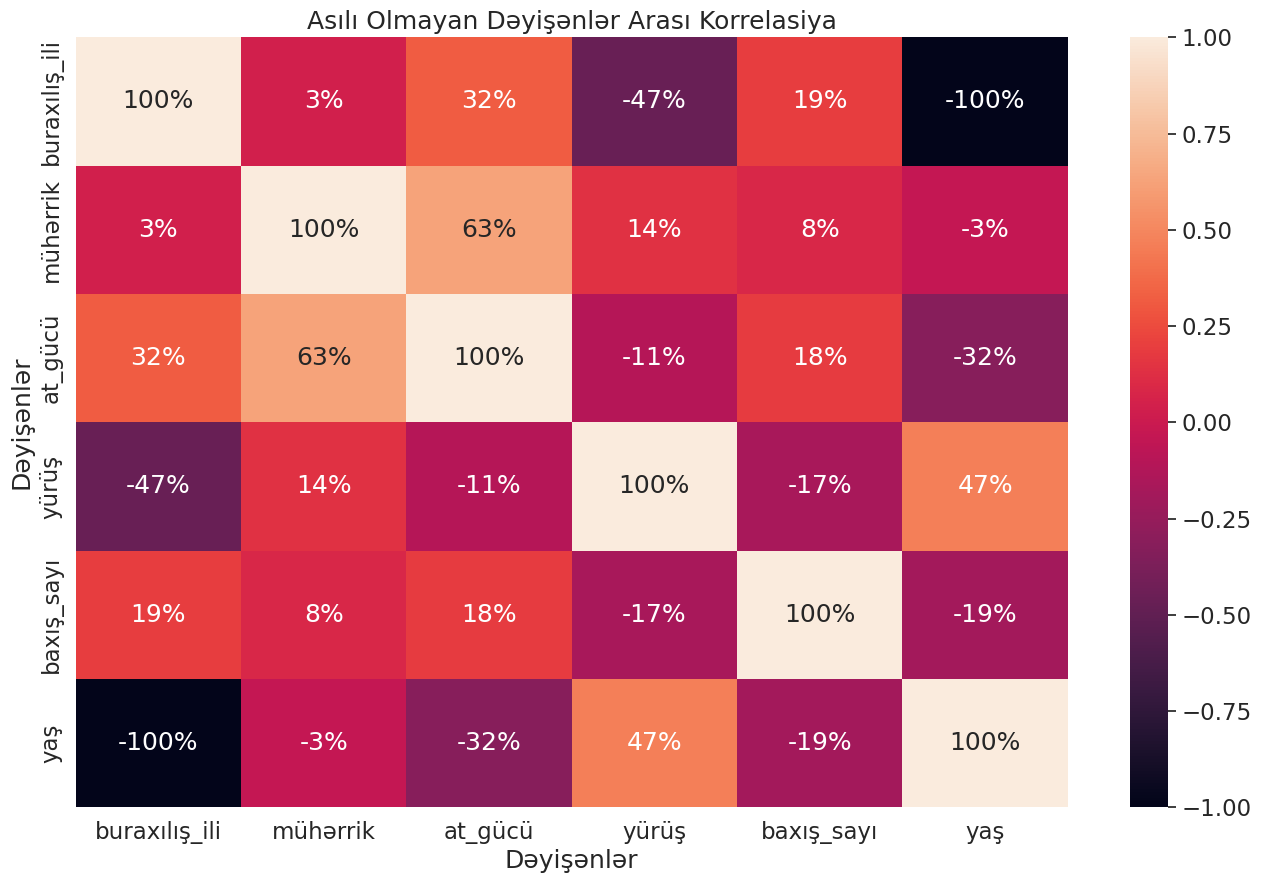

In [ ]:
# Kodu bu şərhin altına yaz
sns.heatmap(df.drop(['elan_ili', 'elan_ayı','elan_günü','elan_həftə_günü','qiymət'], axis=1).corr(), annot=True, fmt='.0%');
plt.title('Asılı Olmayan Dəyişənlər Arası Korrelasiya');
plt.ylabel('Dəyişənlər');
plt.xlabel('Dəyişənlər');

***
### Tapşırıq #9
- Ən azı bir boş xanası olan sətirlərin sayını göstər

In [ ]:
# Kodu bu şərhin altına yaz

sətir_sayı = df.isnull().any(axis=0).sum()
assert sətir_sayı == 0

print(f'Ən azı bir boş xanası olan sətirlərin sayı: {sətir_sayı}')

Ən azı bir boş xanası olan sətirlərin sayı: 0


- Sütunlar üzrə boş xanaların sayını göstər

In [ ]:
# Kodu bu şərhin altına yaz
df.isnull().any(axis=1).sum()

0

- Dublikat dəyərlərin sayını göstər

In [ ]:
# Kodu bu şərhin altına yaz

dublikat_sətir_sayı = df.duplicated().sum()
assert dublikat_sətir_sayı == 0

print(f'Dublikat sətirlərin sayı: {dublikat_sətir_sayı}')

Dublikat sətirlərin sayı: 0


- **yanacaq_növü** sütununun dəyərlərini faiz olaraq ümumi sütunun neçə faiz təşkil etdiyini göstər

In [ ]:
# Kodu bu şərhin altına yaz
df['yanacaq_növü'].value_counts(normalize=True)

Benzin     0.784576
Dizel      0.189440
Hibrid     0.024387
Qaz        0.001231
Elektro    0.000366
Name: yanacaq_növü, dtype: float64

- Ən bahalı beş nəqliyyat vasitəsinin olduğu sətirləri göstər

In [ ]:
# Kodu bu şərhin altına yaz
df.sort_values(by='qiymət', ascending=False).head()

,şəhər,növ,marka,model,buraxılış_ili,rəng,mühərrik,at_gücü,yanacaq_növü,yürüş,sürət_qutusu,yeni,ötürücü,qiymət,baxış_sayı,salon_maşını,yaş,ortala_qiymətdən_böyük,elan_ili,elan_ayı,elan_günü,elan_həftə_günü,qiymət_kateqoriyası,qiymət_faizi
17284,Bakı,Offroader/SUV,Mercedes,G 63 AMG,2019,Ağ,4.0,800,Benzin,5000,Avtomat,Xeyr,Tam,612000,12833,Bəli,4,Bəli,2021,9,18,5,Lyüks,Q4
286,Bakı,Kupe,Bentley,Continental,2018,Boz,6.0,635,Benzin,0,Avtomat,Bəli,Arxa,541190,190094,Bəli,5,Bəli,2021,9,19,6,Lyüks,Q4
317,Bakı,Offroader/SUV,Bentley,Bentayga,2021,Qara,4.0,550,Benzin,0,Avtomat,Bəli,Tam,523090,8395,Bəli,2,Bəli,2021,1,9,5,Lyüks,Q4
318,Bakı,Sedan,Bentley,Flying Spur,2021,Qara,4.0,550,Benzin,0,Avtomat,Bəli,Tam,515850,60419,Bəli,2,Bəli,2021,1,9,5,Lyüks,Q4
311,Bakı,Sedan,Bentley,Flying Spur,2021,Qara,4.0,550,Benzin,0,Avtomat,Bəli,Tam,496483,6416,Bəli,2,Bəli,2021,4,9,4,Lyüks,Q4


- Ən ucuz beş nəqliyyat vasitəsinin olduğu sətirləri göstər

In [ ]:
# Kodu bu şərhin altına yaz
df.sort_values(by='qiymət').head()

,şəhər,növ,marka,model,buraxılış_ili,rəng,mühərrik,at_gücü,yanacaq_növü,yürüş,sürət_qutusu,yeni,ötürücü,qiymət,baxış_sayı,salon_maşını,yaş,ortala_qiymətdən_böyük,elan_ili,elan_ayı,elan_günü,elan_həftə_günü,qiymət_kateqoriyası,qiymət_faizi
6515,Bakı,Motosiklet,Honda,Dio AF,2021,Qara,0.1,10,Benzin,1,Avtomat,Bəli,Arxa,700,1819,Xeyr,2,Xeyr,2021,9,13,0,Çox Ucuz,Q1
6503,Bakı,Motosiklet,Honda,Dio AF,2021,Ağ,0.8,10,Benzin,54000,Avtomat,Xeyr,Arxa,860,1052,Xeyr,2,Xeyr,2021,9,15,2,Çox Ucuz,Q1
151,Digər,Sedan,Audi,V8,1990,Qara,2.2,165,Benzin,198000,Mexaniki,Xeyr,Tam,1100,2912,Xeyr,33,Xeyr,2021,9,13,0,Çox Ucuz,Q1
14409,Bakı,Sedan,LADA (VAZ),21011,1979,Qırmızı,1.5,65,Benzin,85000,Mexaniki,Xeyr,Arxa,1200,8521,Xeyr,44,Xeyr,2021,6,9,2,Çox Ucuz,Q1
12068,Digər,Sedan,LADA (VAZ),21011,1979,Qırmızı,1.5,65,Benzin,234560,Mexaniki,Xeyr,Arxa,1200,10263,Xeyr,44,Xeyr,2021,9,22,2,Çox Ucuz,Q1


- **növ** sütununun unikal dəyərlərini göstər

In [ ]:
# Kodu bu şərhin altına yaz
df['növ'].unique()

array(['Sedan', 'Hetçbek/Liftbek', 'Offroader/SUV', 'Kupe', 'Universal',
       'Kabrio', 'Minivan', 'Pikap', 'Furqon', 'Van', 'Karvan',
       'Yükmaşını', 'Dartqı', 'Mikroavtobus', 'Avtobus', 'Motosiklet',
       'Rodster'], dtype=object)

- **şəhər** sütununun unikal dəyərlərinin sayını göstər

In [ ]:
# Kodu bu şərhin altına yaz
df['şəhər'].unique()

array(['Bakı', 'Digər'], dtype=object)

***
### Tapşırıq #10
- **qiymət_kateqoriyası** sütununu qruplaşdır və hər bir unikal dəyər üçün ortalama qiyməti DataFrame data strukturunda göstər, **qiymət_kateqoriyası** sütunu **indeks** olmalı ortalama qiymətlər isə azalan sıra ilə düzülməlidir

In [ ]:
# Kodu bu şərhin altına yaz
pd.DataFrame(df.groupby('qiymət_kateqoriyası')['qiymət'].mean().sort_values(ascending=False))

,qiymət
qiymət_kateqoriyası,
Lyüks,372882.860465
Çox Bahalı,202758.322188
Bahalı,79886.994399
Normal,38367.698876
Ucuz,16764.065929
Çox Ucuz,6681.421697


- **qiymət_kateqoriyası** sütununu qruplaşdır və hər bir unikal dəyər üçün ortalama, median, maksimum, və minimum qiyməti DataFrame data strukturunda göstər, **qiymət_kateqoriyası** sütunu **indeks** olmalı ortalama, median, maksimum və minimum qiymətlər isə azalan sıra ilə düzülməlidir

In [ ]:
# Kodu bu şərhin altına yaz
pd.DataFrame(df.groupby('qiymət_kateqoriyası')['qiymət'].agg(['mean', 'median', 'max', 'min']).sort_values(by=['mean', 'median', 'max', 'min'], ascending=False))

,mean,median,max,min
qiymət_kateqoriyası,,,,
Lyüks,372882.860465,335750.0,612000,300730
Çox Bahalı,202758.322188,197030.0,299555,150450
Bahalı,79886.994399,72250.0,149600,50150
Normal,38367.698876,37500.0,50000,30005
Ucuz,16764.065929,15100.0,30000,10050
Çox Ucuz,6681.421697,6800.0,10000,700


- **qiymət_kateqoriyası** sütununu qruplaşdır və hər bir unikal dəyər üçün ortalama qiyməti və at gücünü DataFrame data strukturunda göstər

In [ ]:
# Kodu bu şərhin altına yaz
pd.DataFrame(df.groupby('qiymət_kateqoriyası')['qiymət', 'at_gücü'].agg(['mean']))

,qiymət,at_gücü
,mean,mean
qiymət_kateqoriyası,,
Çox Ucuz,6681.421697,107.617852
Ucuz,16764.065929,152.896948
Normal,38367.698876,228.997892
Bahalı,79886.994399,293.912107
Çox Bahalı,202758.322188,407.924012
Lyüks,372882.860465,547.069767


- **qiymət_kateqoriyası** sütununu qruplaşdır və hər bir unikal dəyər üçün ortalama, median, maksimum, minimum qiyməti və at gücünü DataFrame data strukturunda göstər

In [ ]:
# Kodu bu şərhin altına yaz
pd.DataFrame(df.groupby('qiymət_kateqoriyası')['qiymət', 'at_gücü'].agg(['mean', 'median', 'max', 'min']))

qiymət                               at_gücü  \
                              mean    median     max     min        mean   
qiymət_kateqoriyası                                                        
Çox Ucuz               6681.421697    6800.0   10000     700  107.617852   
Ucuz                  16764.065929   15100.0   30000   10050  152.896948   
Normal                38367.698876   37500.0   50000   30005  228.997892   
Bahalı                79886.994399   72250.0  149600   50150  293.912107   
Çox Bahalı           202758.322188  197030.0  299555  150450  407.924012   
Lyüks                372882.860465  335750.0  612000  300730  547.069767   

                                      
                    median  max  min  
qiymət_kateqoriyası                   
Çox Ucuz              99.0  780    1  
Ucuz                 143.0  840   35  
Normal               218.0  612   58  
Bahalı               260.0  630   30  
Çox Bahalı           383.0  900  163  
Lyüks                550.0  800  385

- **qiymət_kateqoriyası** sütununu qruplaşdır və hər bir unikal dəyər üçün ortalama qiyməti və median at gücünü DataFrame data strukturunda göstər

In [ ]:
# Kodu bu şərhin altına yaz
df.groupby('qiymət_kateqoriyası').agg({'qiymət':'mean', 'at_gücü':'median'})


,qiymət,at_gücü
qiymət_kateqoriyası,,
Çox Ucuz,6681.421697,99.0
Ucuz,16764.065929,143.0
Normal,38367.698876,218.0
Bahalı,79886.994399,260.0
Çox Bahalı,202758.322188,383.0
Lyüks,372882.860465,550.0


- **qiymət_kateqoriyası** sütununu qruplaşdır və hər bir unikal dəyər üçün ortalama, minimum qiyməti və median, maksimum at gücünü DataFrame data strukturunda göstər

In [ ]:
# Kodu bu şərhin altına yaz
df.groupby('qiymət_kateqoriyası').agg({'qiymət':['mean', 'min'], 'at_gücü':['median', 'max']})

qiymət         at_gücü     
                              mean     min  median  max
qiymət_kateqoriyası                                    
Çox Ucuz               6681.421697     700    99.0  780
Ucuz                  16764.065929   10050   143.0  840
Normal                38367.698876   30005   218.0  612
Bahalı                79886.994399   50150   260.0  630
Çox Bahalı           202758.322188  150450   383.0  900
Lyüks                372882.860465  300730   550.0  800

***
### Tapşırıq #11
- **marka** sütununu ***BMW*** olan ilk beş sətiri göstər

In [ ]:
# Kodu bu şərhin altına yaz
df[df['marka'] == 'BMW'].head()

,şəhər,növ,marka,model,buraxılış_ili,rəng,mühərrik,at_gücü,yanacaq_növü,yürüş,sürət_qutusu,yeni,ötürücü,qiymət,baxış_sayı,salon_maşını,yaş,ortala_qiymətdən_böyük,elan_ili,elan_ayı,elan_günü,elan_həftə_günü,qiymət_kateqoriyası,qiymət_faizi
323,Bakı,Sedan,BMW,328,2016,Qara,2.0,245,Benzin,53300,Avtomat,Xeyr,Arxa,37400,1267,Xeyr,7,Bəli,2021,9,23,3,Normal,Q4
324,Bakı,Sedan,BMW,528,2012,Yaş Asfalt,2.0,245,Benzin,105000,Avtomat,Xeyr,Arxa,35530,877,Xeyr,11,Bəli,2021,9,23,3,Normal,Q4
325,Bakı,Sedan,BMW,528,2015,Ağ,2.0,245,Benzin,89319,Avtomat,Xeyr,Arxa,44200,871,Xeyr,8,Bəli,2021,9,23,3,Normal,Q4
326,Bakı,Sedan,BMW,320,2014,Ağ,2.0,184,Dizel,99000,Avtomat,Xeyr,Arxa,39440,63,Xeyr,9,Bəli,2021,9,23,3,Normal,Q4
327,Digər,Sedan,BMW,530,2009,Qara,3.0,272,Benzin,130000,Avtomat,Xeyr,Arxa,22900,2964,Bəli,14,Xeyr,2021,9,23,3,Ucuz,Q3


- **marka** sütununu ***BMW*** və **rəng** sütunu ***Ağ*** olan ilk beş sətiri göstər

In [ ]:
# Kodu bu şərhin altına yaz
df[(df['marka'] == 'BMW') & (df['rəng'] == 'Ağ')].head()

,şəhər,növ,marka,model,buraxılış_ili,rəng,mühərrik,at_gücü,yanacaq_növü,yürüş,sürət_qutusu,yeni,ötürücü,qiymət,baxış_sayı,salon_maşını,yaş,ortala_qiymətdən_böyük,elan_ili,elan_ayı,elan_günü,elan_həftə_günü,qiymət_kateqoriyası,qiymət_faizi
325,Bakı,Sedan,BMW,528,2015,Ağ,2.0,245,Benzin,89319,Avtomat,Xeyr,Arxa,44200,871,Xeyr,8,Bəli,2021,9,23,3,Normal,Q4
326,Bakı,Sedan,BMW,320,2014,Ağ,2.0,184,Dizel,99000,Avtomat,Xeyr,Arxa,39440,63,Xeyr,9,Bəli,2021,9,23,3,Normal,Q4
334,Bakı,Sedan,BMW,528,2013,Ağ,2.0,245,Benzin,209000,Avtomat,Xeyr,Arxa,31450,123,Xeyr,10,Xeyr,2021,9,23,3,Normal,Q4
336,Bakı,Sedan,BMW,528,2012,Ağ,2.0,245,Benzin,181000,Avtomat,Xeyr,Arxa,35360,727,Xeyr,11,Bəli,2021,9,23,3,Normal,Q4
337,Bakı,Sedan,BMW,528,2008,Ağ,3.0,234,Benzin,176000,Avtomat,Xeyr,Arxa,18700,2893,Xeyr,15,Xeyr,2021,9,23,3,Ucuz,Q3


- **marka** sütununu ***BMW***, **rəng** sütunu ***Ağ*** və **yanacaq_növü** sütunu ***Benzin*** olan təsadüfi beş sətiri göstər

In [ ]:
np.random.seed(seed = 42)

# Kodu bu şərhin altına yaz
df[(df['marka'] == 'BMW') & (df['rəng'] == 'Ağ') & (df['yanacaq_növü'] == 'Benzin')].sample(n=5)

,şəhər,növ,marka,model,buraxılış_ili,rəng,mühərrik,at_gücü,yanacaq_növü,yürüş,sürət_qutusu,yeni,ötürücü,qiymət,baxış_sayı,salon_maşını,yaş,ortala_qiymətdən_böyük,elan_ili,elan_ayı,elan_günü,elan_həftə_günü,qiymət_kateqoriyası,qiymət_faizi
2098,Bakı,Sedan,BMW,528,2014,Ağ,2.0,245,Benzin,113000,Avtomat,Xeyr,Arxa,44540,703,Bəli,9,Bəli,2021,8,31,1,Normal,Q4
482,Bakı,Offroader/SUV,BMW,X5,2010,Ağ,4.4,507,Benzin,223665,Avtomat,Xeyr,Arxa,32000,7513,Xeyr,13,Xeyr,2021,9,22,2,Normal,Q4
383,Bakı,Offroader/SUV,BMW,X5,2005,Ağ,4.8,360,Benzin,290000,Avtomat,Xeyr,Tam,21500,1334,Xeyr,18,Xeyr,2021,9,22,2,Ucuz,Q3
2006,Digər,Offroader/SUV,BMW,X6,2008,Ağ,4.4,407,Benzin,156000,Avtomat,Xeyr,Tam,30600,10842,Xeyr,15,Xeyr,2021,2,9,1,Normal,Q4
594,Bakı,Sedan,BMW,550,2011,Ağ,4.4,407,Benzin,45000,Avtomat,Xeyr,Arxa,66300,551,Bəli,12,Bəli,2021,9,21,1,Bahalı,Q4


- **marka** sütununu ***Audi***, ***BMW***, ***Mercedes***, ***Opel***, ***Porsche***, ***Volkswagen*** olan sətirlərlərdə ortalama qiyməti göstər

In [ ]:
# Kodu bu şərhin altına yaz
pd.DataFrame(df[df['marka'].isin(['Audi', 'BMW', 'Mercedes', 'Opel', 'Porsche', 'Volkswagen'])].groupby('marka')['qiymət'].mean())

,qiymət
marka,
Audi,40418.851449
BMW,33684.414956
Mercedes,23812.308560
Opel,9605.958887
Porsche,85959.786585
Volkswagen,15862.085890


- **marka** sütununu ***BMW*** və ya ***Mercedes*** olan son beş sətiri göstər

In [ ]:
# Kodu bu şərhin altına yaz
df[(df['marka'] == 'BMW') | (df['marka'] == 'Mercedes')].tail()

,şəhər,növ,marka,model,buraxılış_ili,rəng,mühərrik,at_gücü,yanacaq_növü,yürüş,sürət_qutusu,yeni,ötürücü,qiymət,baxış_sayı,salon_maşını,yaş,ortala_qiymətdən_böyük,elan_ili,elan_ayı,elan_günü,elan_həftə_günü,qiymət_kateqoriyası,qiymət_faizi
22837,Bakı,Sedan,Mercedes,190,1990,Qızılı,2.0,122,Benzin,450000,Avtomat,Xeyr,Arxa,6500,273,Xeyr,33,Xeyr,2021,8,24,1,Çox Ucuz,Q1
22838,Digər,Sedan,Mercedes,E 200,1991,Mavi,2.0,122,Benzin,380000,Avtomat,Xeyr,Arxa,5500,1361,Xeyr,32,Xeyr,2021,8,24,1,Çox Ucuz,Q1
22839,Bakı,Sedan,Mercedes,E 230,1991,Ağ,2.3,150,Benzin,10000,Avtomat,Xeyr,Arxa,5700,648,Xeyr,32,Xeyr,2021,8,24,1,Çox Ucuz,Q1
22840,Bakı,Sedan,Mercedes,250,1985,Qırmızı,2.5,145,Dizel,350000,Mexaniki,Xeyr,Arxa,6500,1769,Xeyr,38,Xeyr,2021,8,24,1,Çox Ucuz,Q1
22841,Bakı,Sedan,Mercedes,E 200,2011,Qara,2.2,136,Dizel,162000,Avtomat,Xeyr,Arxa,32000,916,Xeyr,12,Bəli,2021,8,24,1,Normal,Q4


- **marka** sütununu ***BMW*** və ya ***Mercedes*** olan, rəngi ***Göy*** olan son beş sətiri göstər

In [ ]:
# Kodu bu şərhin altına yaz
df[((df['marka'] == 'BMW') | (df['marka'] == 'Mercedes')) & (df['rəng'] == 'Göy')].tail()

,şəhər,növ,marka,model,buraxılış_ili,rəng,mühərrik,at_gücü,yanacaq_növü,yürüş,sürət_qutusu,yeni,ötürücü,qiymət,baxış_sayı,salon_maşını,yaş,ortala_qiymətdən_böyük,elan_ili,elan_ayı,elan_günü,elan_həftə_günü,qiymət_kateqoriyası,qiymət_faizi
22797,Digər,Sedan,Mercedes,C 200,1998,Göy,2.0,136,Benzin,429000,Avtomat,Xeyr,Arxa,11000,982,Xeyr,25,Xeyr,2021,8,24,1,Ucuz,Q2
22807,Bakı,Sedan,Mercedes,C 240,2000,Göy,2.6,170,Benzin,280000,Avtomat,Xeyr,Arxa,9900,1033,Xeyr,23,Xeyr,2021,8,24,1,Çox Ucuz,Q2
22809,Bakı,Sedan,Mercedes,C 180,1995,Göy,1.8,122,Benzin,385000,Avtomat,Xeyr,Arxa,8300,373,Xeyr,28,Xeyr,2021,8,24,1,Çox Ucuz,Q1
22810,Bakı,Sedan,Mercedes,E 240,1997,Göy,2.4,170,Benzin,300000,Avtomat,Xeyr,Arxa,12900,263,Xeyr,26,Xeyr,2021,8,24,1,Ucuz,Q2
22814,Digər,Universal,Mercedes,C 200,1998,Göy,2.0,136,Benzin,456256,Mexaniki,Xeyr,Arxa,9000,1759,Xeyr,25,Xeyr,2021,8,24,1,Çox Ucuz,Q1


- **marka** sütununu ***Kia***, ***Ford*** və ya ***Hyundai*** olmayan və **yanacaq_növü** sütunu ***Dizel*** olan təsadüfi beş sətiri göstər

In [ ]:
np.random.seed(seed = 42)

# Kodu bu şərhin altına yaz
df[((df['marka'] != 'Kia') & (df['marka'] != 'Ford') & (df['marka'] != 'Hyundai')) & (df['yanacaq_növü'] == 'Dizel')].sample(n=5)

#ikinci yol
# df[~(df['marka'].isin(['Kia', 'Ford', 'Hyundai'])) & (df['yanacaq_növü'] == 'Dizel')].sample(n=5)

,şəhər,növ,marka,model,buraxılış_ili,rəng,mühərrik,at_gücü,yanacaq_növü,yürüş,sürət_qutusu,yeni,ötürücü,qiymət,baxış_sayı,salon_maşını,yaş,ortala_qiymətdən_böyük,elan_ili,elan_ayı,elan_günü,elan_həftə_günü,qiymət_kateqoriyası,qiymət_faizi
15793,Bakı,Van,Mercedes,V 220,2014,Qara,2.2,163,Dizel,191000,Avtomat,Xeyr,Arxa,69700,150,Bəli,9,Bəli,2021,9,22,2,Bahalı,Q4
15645,Bakı,Mikroavtobus,Mercedes,Sprinter 313,2008,Ağ,2.2,129,Dizel,350000,Mexaniki,Xeyr,Arxa,33000,172,Xeyr,15,Bəli,2021,9,22,2,Normal,Q4
18587,Bakı,Van,Mercedes,Vito 111,2010,Qırmızı,2.2,116,Dizel,270000,Mexaniki,Xeyr,Arxa,27500,483,Xeyr,13,Bəli,2021,9,13,0,Ucuz,Q4
18716,Bakı,Van,Mercedes,Vito,2011,Qara,2.2,150,Dizel,273291,Avtomat,Xeyr,Arxa,30000,645,Xeyr,12,Bəli,2021,9,13,0,Ucuz,Q4
24234,Bakı,Hetçbek/Liftbek,Nissan,Tiida,2008,Göy,1.5,110,Dizel,138000,Mexaniki,Xeyr,Ön,11300,1330,Xeyr,15,Xeyr,2021,9,15,2,Ucuz,Q2


***
### Tapşırıq #12
- ***mühərrik***, ***at_gücü***, və ***yürüş*** sütunlarının **z dəyərlərini** hesablayıb ən azı bir kənar dəyərə malik sütunu **features** dəyişəninə yaz

In [ ]:
features = []

# Kodu bu şərhin altına yaz
columns = ['mühərrik', 'at_gücü', 'yürüş']
for feature in columns:
  zscore = np.where(stats.zscore(a = df[feature], nan_policy='omit').abs() >= 3, 1, 0)

  if 1 in zscore: features.append(feature)
  else: pass


print(f'Ən azı bir kənar dəyəri olan dəyişənlər: {features}')

Ən azı bir kənar dəyəri olan dəyişənlər: ['mühərrik', 'at_gücü', 'yürüş']


- Bu dəyişən(lər)in **Boxplot**-nu qur

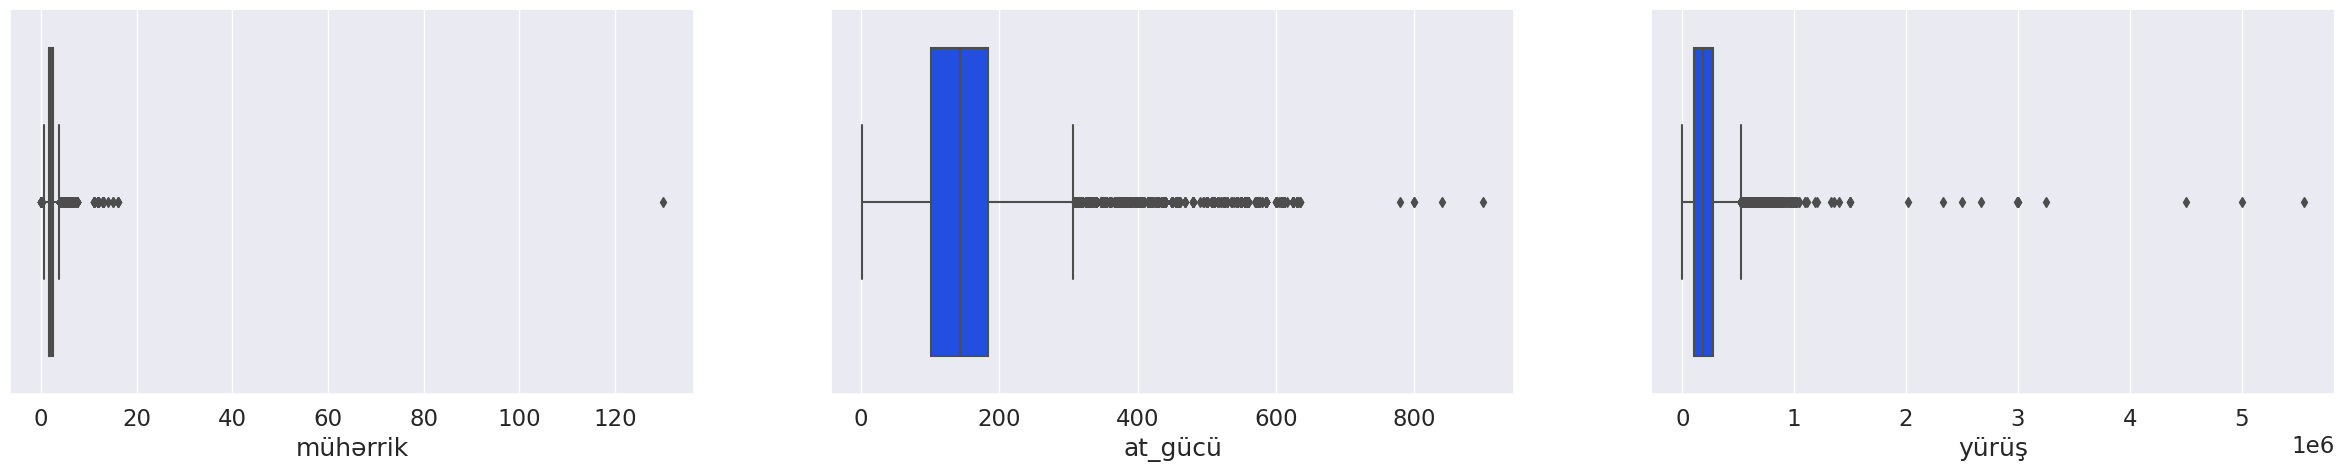

In [ ]:
plt.figure(figsize = (30, 5))
plt.subplot(1, 3, 1)
# Kodu bu şərhin altına yaz
sns.boxplot(x='mühərrik', data=df)
plt.subplot(1, 3, 2)
# Kodu bu şərhin altına yaz
sns.boxplot(x='at_gücü', data=df)

plt.subplot(1, 3, 3)
# Kodu bu şərhin altına yaz
sns.boxplot(x='yürüş', data=df)

plt.show()

- Sadə döngü vasitəsilə **Inter Quartile Range** metodu ilə kənar dəyişənləri yuxarı və aşağı limit dəyərləri ilə əvəzlə

In [ ]:
# Kodu bu şərhin altına yaz
for feature in features:
  Q3 = df[feature].quantile(0.75)
  Q1 = df[feature].quantile(0.25)
  IQR = Q3 - Q1
  outlier_range = IQR * 1.5
  upper_limit = Q3 + outlier_range
  lower_limit = Q1 - outlier_range

  df[feature] = np.where(df[feature] >= upper_limit, upper_limit, df[feature])
  df[feature] = np.where(df[feature] <= lower_limit, lower_limit, df[feature])

- Bu dəyişən(lər)in yenidən **Boxplot**-nu qur

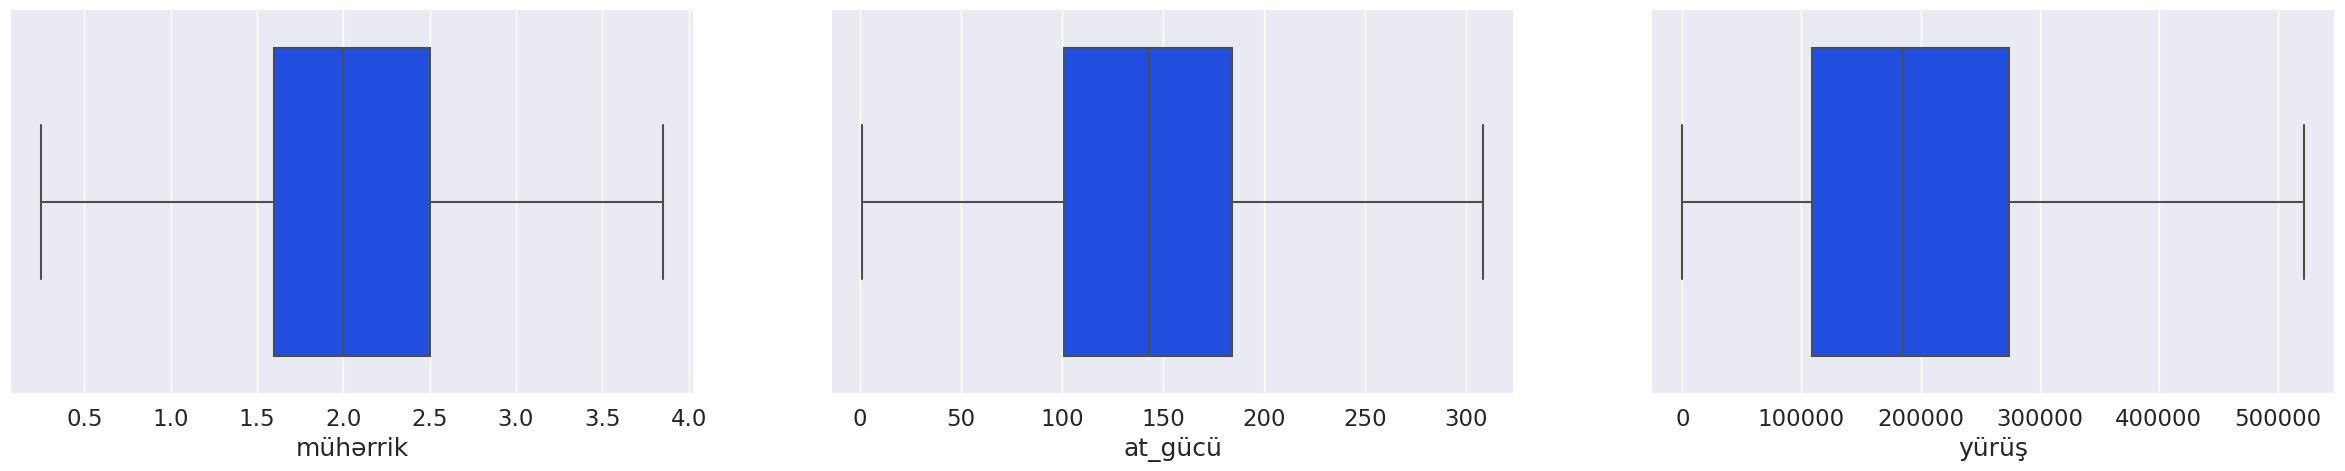

In [ ]:
plt.figure(figsize = (30, 5))
plt.subplot(1, 3, 1)
# Kodu bu şərhin altına yaz
sns.boxplot(x='mühərrik', data=df)
plt.subplot(1, 3, 2)
# Kodu bu şərhin altına yaz
sns.boxplot(x='at_gücü', data=df)

plt.subplot(1, 3, 3)
# Kodu bu şərhin altına yaz
sns.boxplot(x='yürüş', data=df)

plt.show()